# **Nama** : Ajwa Nabawiya (2304010024)

# Mata Kuliah: Machine Learning
### Topik: Sampling dan Exploratory Data Analysis (EDA)
### Dataset: Iris

Tujuan 
Mahasiswa mampu: 
1. Memahami konsep sampling dan resampling 
2. Melakukan bootstrap sampling 
3. Menghitung statistik deskriptif 
4. Melakukan eksplorasi data (EDA) 
5. Membuat visualisasi data 
6. Membandingkan data asli dan hasil sampling 
7. Menarik kesimpulan dari data 

## Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

## Load Data

In [2]:
iris = load_iris()

In [3]:
# Buat DataFrame dari fitur
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Bagian A — Eksplorasi Data Awal

### 1. Informasi Dataset 

Tampilkan: 
- Jumlah data 
- Jumlah variabel 
- Tipe data tiap variabel 
- Jumlah masing-masing spesies

In [4]:
# Tambahkan kolom species
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Penambahan kolom species pada DataFrame bertujuan untuk mengubah label numerik (0, 1, 2) menjadi nama spesies yang sebenarnya, yaitu setosa, versicolor, dan virginica. Hal ini membuat data lebih mudah dibaca dan dipahami, terutama saat melakukan eksplorasi data, menghitung jumlah masing-masing spesies, atau membuat visualisasi per spesies.

In [5]:
print("Jumlah data :", df.shape[0])
print("Jumlah variabel :", df.shape[1])

print("\nTipe data tiap variabel:")
print(df.dtypes)

print("\nJumlah masing-masing spesies:")
print(df['species'].value_counts())

Jumlah data : 150
Jumlah variabel : 5

Tipe data tiap variabel:
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

Jumlah masing-masing spesies:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Berdasarkan hasil eksplorasi data, dataset Iris terdiri dari 150 data dengan 5 variabel, yaitu empat variabel numerik (sepal length, sepal width, petal length, dan petal width) serta satu variabel kategorikal (species). Keempat variabel fitur memiliki tipe data float64, yang menunjukkan bahwa data berupa nilai numerik kontinu, sedangkan variabel species bertipe category, karena berisi label kelas. Distribusi data antar spesies menunjukkan bahwa masing-masing kelas, yaitu setosa, versicolor, dan virginica, memiliki jumlah yang sama, yaitu 50 data. Hal ini menandakan bahwa dataset Iris bersifat seimbang (balanced dataset), sehingga tidak terdapat masalah ketimpangan kelas dalam analisis.

### 2. Statistik Deskriptif 

In [6]:
# Pilih hanya variabel numerik (tanpa species)
numeric_df = df.select_dtypes(include='number')

# Mean
print("\nMean:")
print(numeric_df.mean())

# Median
print("\nMedian:")
print(numeric_df.median())

# Standar Deviasi
print("\nStandar Deviasi:")
print(numeric_df.std())

# Minimum
print("\nMinimum:")
print(numeric_df.min())

# Maximum
print("\nMaximum:")
print(numeric_df.max())


Mean:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Median:
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Standar Deviasi:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

Minimum:
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

Maximum:
sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64


In [7]:
stats = pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Std Dev': numeric_df.std(),
    'Minimum': numeric_df.min(),
    'Maximum': numeric_df.max()
})

print(stats)

                       Mean  Median   Std Dev  Minimum  Maximum
sepal length (cm)  5.843333    5.80  0.828066      4.3      7.9
sepal width (cm)   3.057333    3.00  0.435866      2.0      4.4
petal length (cm)  3.758000    4.35  1.765298      1.0      6.9
petal width (cm)   1.199333    1.30  0.762238      0.1      2.5


Berdasarkan output statistik deskriptif tersebut, dapat dijelaskan bahwa setiap variabel numerik memiliki karakteristik penyebaran yang berbeda.

Variabel sepal length (cm) memiliki rata-rata sebesar 5.84 dengan median 5.80, yang menunjukkan distribusi relatif simetris karena nilai mean dan median hampir sama. Rentang nilainya cukup lebar, yaitu dari 4.3 hingga 7.9 cm, dengan standar deviasi 0.83 yang menunjukkan variasi sedang.

Pada sepal width (cm), rata-rata sebesar 3.06 dan median 3.00 juga menunjukkan distribusi yang cukup seimbang. Nilai minimum 2.0 dan maksimum 4.4 dengan standar deviasi 0.44 mengindikasikan bahwa variasinya lebih kecil dibandingkan sepal length.

Untuk petal length (cm), rata-rata 3.76 dan median 4.35 menunjukkan adanya sedikit ketidaksimetrisan distribusi (mean lebih kecil dari median). Rentang nilainya sangat lebar, yaitu 1.0 hingga 6.9 cm, serta memiliki standar deviasi terbesar (1.77), yang menandakan variasi data paling tinggi di antara semua variabel.

Sementara itu, petal width (cm) memiliki rata-rata 1.20 dan median 1.30 dengan rentang 0.1 hingga 2.5 cm. Standar deviasi sebesar 0.76 menunjukkan variasi yang cukup besar, meskipun tidak sebesar petal length.

Secara keseluruhan, variabel petal length dan petal width menunjukkan tingkat variasi yang lebih tinggi dibandingkan variabel sepal, sehingga kedua variabel ini cenderung lebih informatif dalam membedakan karakteristik antar data pada dataset Iris.

### 3. Visualisasi Distribusi 

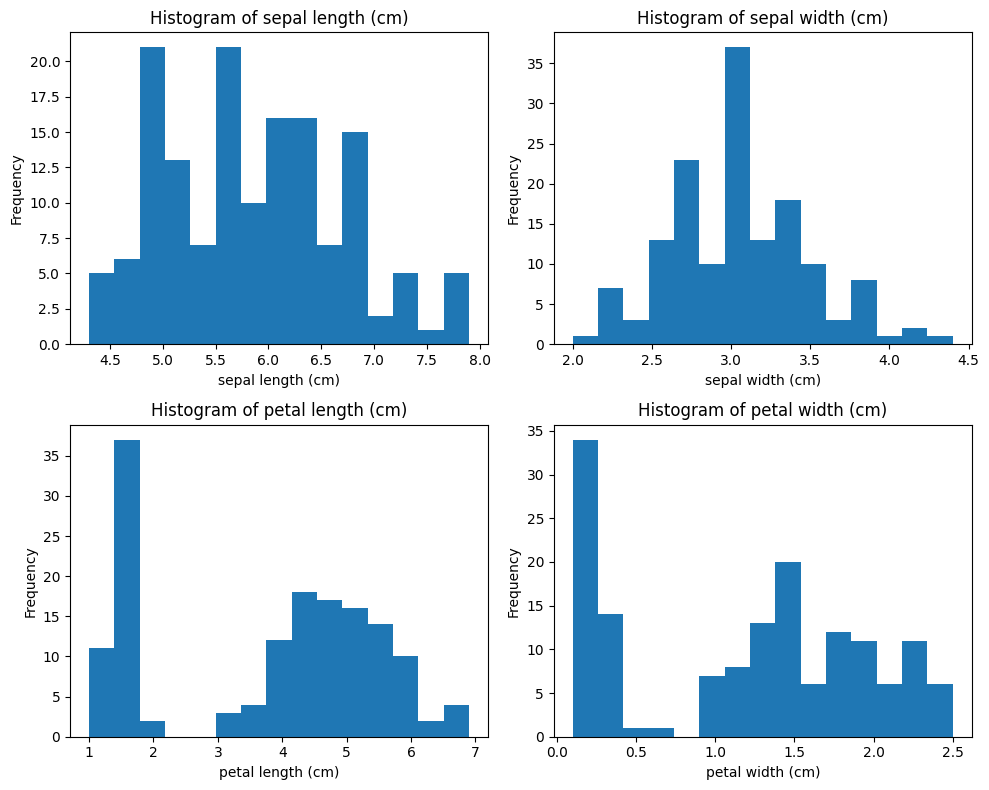

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = iris.feature_names

# Buat 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten supaya mudah di-loop
axes = axes.flatten()

for ax, col in zip(axes, numeric_columns):
    ax.hist(df[col], bins=15)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

1. Sepal Length (cm)

- Bentuk distribusi: Relatif mendekati distribusi normal (lonceng), meskipun tidak sepenuhnya simetris.
- Sebaran data: Nilai tersebar antara sekitar 4.3 hingga 7.9 cm dengan konsentrasi terbesar di sekitar 5–6.5 cm.
- Outlier: Tidak terlihat outlier ekstrem yang sangat jauh dari distribusi utama.

2. Sepal Width (cm)

- Bentuk distribusi: Cenderung sedikit skew (miring), dengan puncak di sekitar 2.8–3.2 cm.
- Sebaran data: Rentang sekitar 2.0 hingga 4.4 cm dan relatif lebih sempit dibanding sepal length.
- Outlier: Tidak tampak outlier ekstrem pada histogram, meskipun nilai di ujung distribusi cukup jarang.

3. Petal Length (cm)

- Bentuk distribusi: Terlihat bimodal (dua puncak). Ini menunjukkan adanya dua kelompok besar dalam data.
- Sebaran data: Rentang cukup lebar, dari sekitar 1.0 hingga 6.9 cm.
- Outlier: Tidak terlihat outlier ekstrem, tetapi terdapat pemisahan yang jelas antar kelompok data.

4. Petal Width (cm)

- Bentuk distribusi: Juga bimodal, mirip dengan petal length.
- Sebaran data: Nilai berkisar antara 0.1 hingga 2.5 cm.
- Outlier: Tidak terlihat outlier ekstrem, namun terdapat dua kelompok distribusi yang cukup terpisah.

Variabel petal length dan petal width menunjukkan pola distribusi bimodal yang kuat, menandakan adanya perbedaan karakteristik antar spesies. Sementara itu, variabel sepal length dan sepal width cenderung memiliki distribusi yang lebih mendekati normal dengan variasi yang lebih merata.

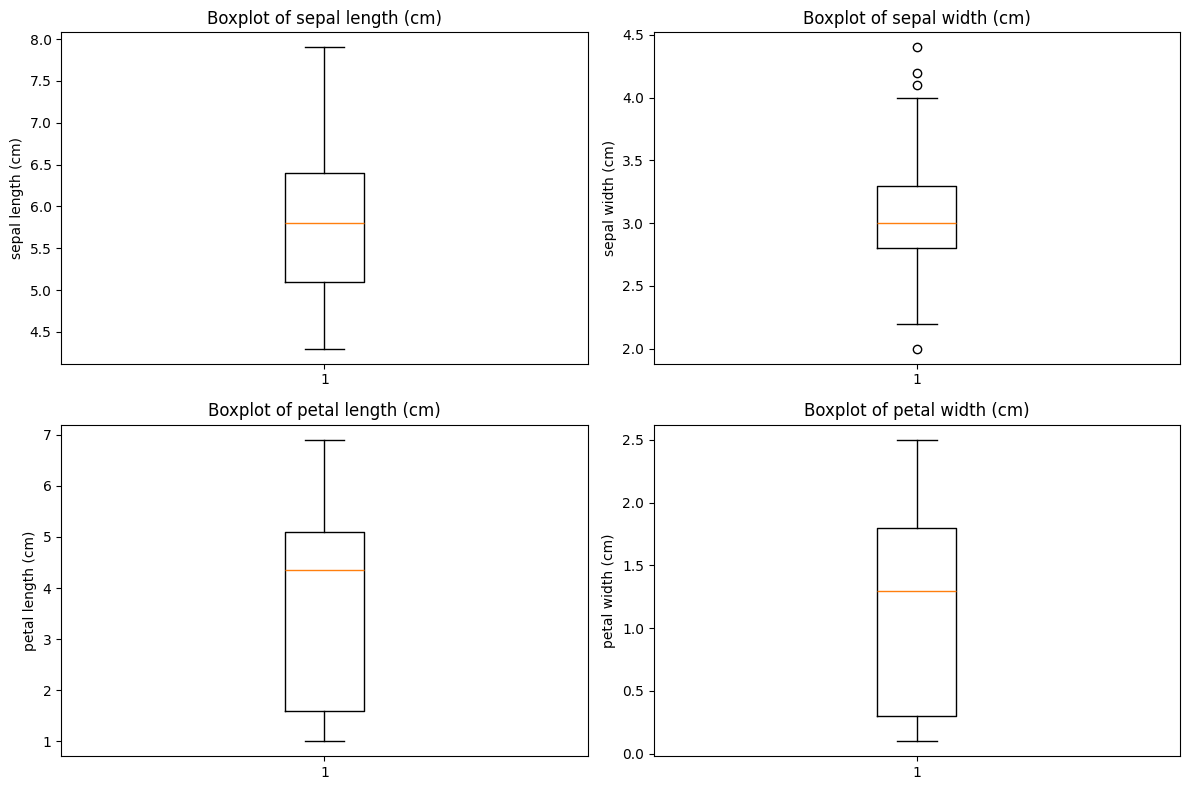

In [9]:
import matplotlib.pyplot as plt

numeric_columns = iris.feature_names

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, col in zip(axes, numeric_columns):
    ax.boxplot(df[col])
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

1. Sepal Length (cm)

- Bentuk distribusi: Relatif simetris karena median berada hampir di tengah box.
- Sebaran data: Rentang cukup lebar (sekitar 4.3–7.9 cm) dengan variasi sedang.
- Outlier: Tidak terlihat outlier yang signifikan.

2. Sepal Width (cm)

- Bentuk distribusi: Sedikit tidak simetris (median agak bergeser).
- Sebaran data: Rentang lebih sempit dibanding sepal length (sekitar 2.0–4.4 cm).
- Outlier: Terdapat beberapa titik di luar whisker, menunjukkan adanya outlier ringan.

3. Petal Length (cm)

- Bentuk distribusi: Distribusi cenderung tidak simetris karena box cukup panjang dan median tidak tepat di tengah.
- Sebaran data: Memiliki rentang paling lebar (1.0–6.9 cm), menunjukkan variasi tinggi.
- Outlier: Tidak terlihat outlier ekstrem.

4. Petal Width (cm)

- Bentuk distribusi: Sedikit tidak simetris.
- Sebaran data: Rentang cukup besar (0.1–2.5 cm).
- Outlier: Tidak terlihat outlier yang mencolok.

Variabel petal length dan petal width memiliki variasi paling tinggi dibandingkan variabel sepal. Outlier hanya terlihat jelas pada sepal width, sedangkan variabel lainnya relatif bersih dari nilai ekstrem.

### 4. Visualisasi Berdasarkan Spesies 

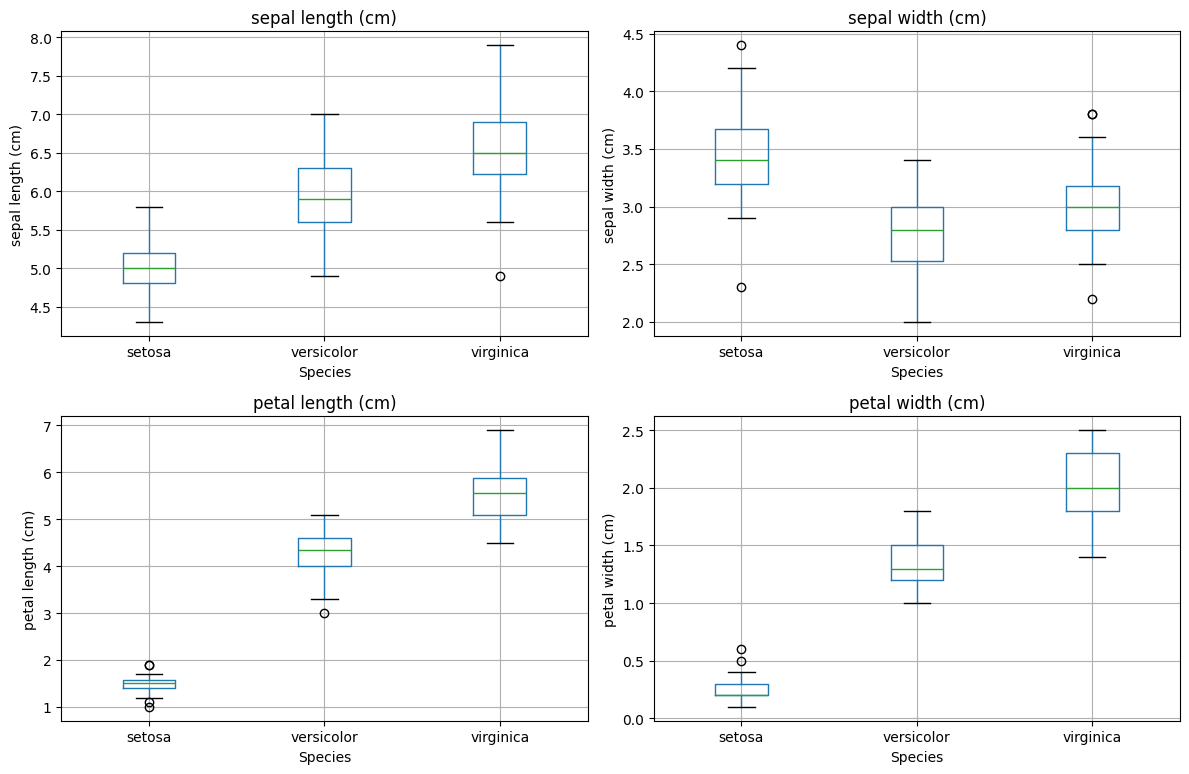

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, col in zip(axes, numeric_columns):
    df.boxplot(column=col, by='species', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Species')
    ax.set_ylabel(col)

plt.suptitle('')  # Hilangkan title default pandas
plt.tight_layout()
plt.show()

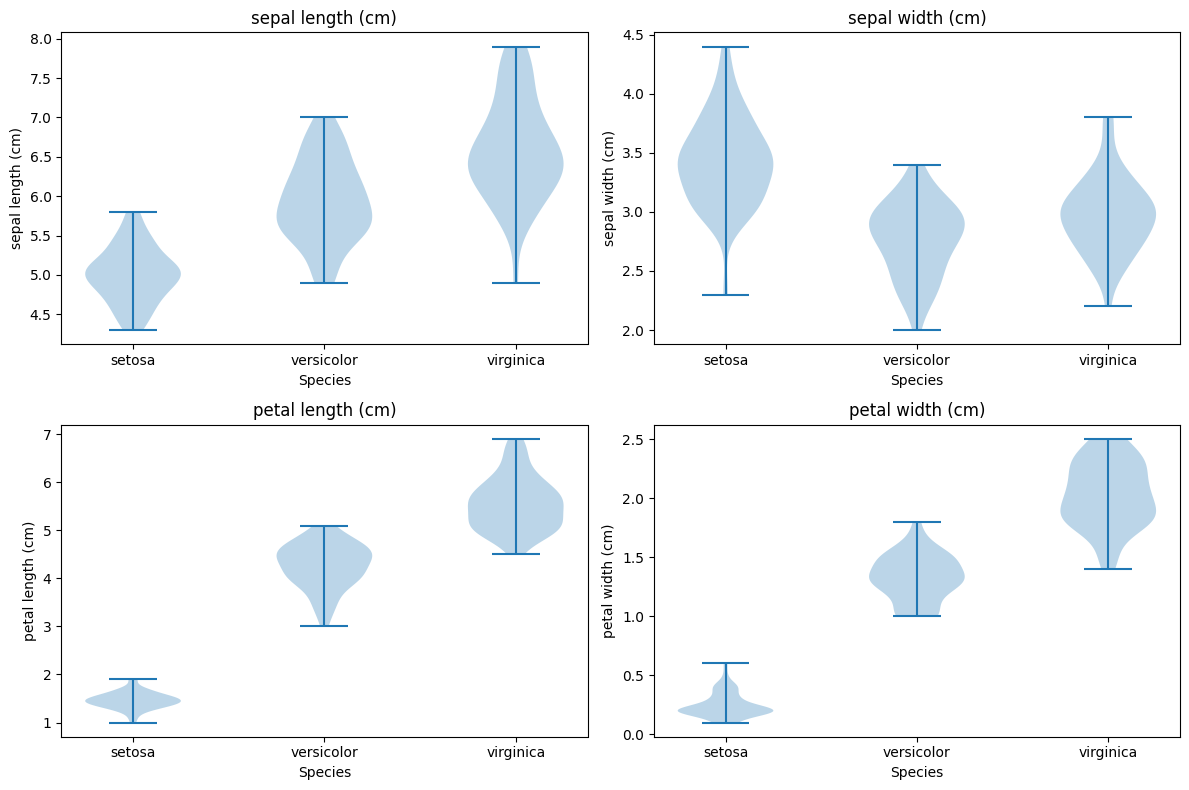

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, col in zip(axes, numeric_columns):

    data = [
        df[df['species'] == 'setosa'][col],
        df[df['species'] == 'versicolor'][col],
        df[df['species'] == 'virginica'][col]
    ]

    ax.violinplot(data)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['setosa', 'versicolor', 'virginica'])
    ax.set_title(col)
    ax.set_xlabel('Species')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

Pada petal length, setosa memiliki nilai paling kecil (sekitar 1–2 cm) dan terpisah sangat jelas dari dua spesies lainnya. Versicolor berada di rentang tengah (sekitar 3–5 cm), sedangkan virginica memiliki nilai terbesar (sekitar 4.5–7 cm). Hampir tidak ada overlap antara setosa dengan spesies lain, sehingga variabel ini sangat efektif untuk membedakan kelas.

Pada petal width, pola yang sama juga terlihat. Setosa memiliki nilai sangat kecil (sekitar 0.1–0.6 cm), versicolor berada di tengah (sekitar 1.0–1.8 cm), dan virginica memiliki nilai terbesar (sekitar 1.4–2.5 cm). Perbedaannya cukup tegas dan distribusinya relatif terpisah.

Untuk sepal length, perbedaan antar spesies masih terlihat, tetapi tidak sejelas variabel petal. Virginica cenderung memiliki sepal length paling besar, diikuti versicolor, dan setosa paling kecil, namun terdapat sedikit overlap antar kelompok.

Pada sepal width, perbedaannya paling kurang tegas dibanding variabel lain. Ketiga spesies memiliki rentang nilai yang cukup tumpang tindih, sehingga variabel ini kurang kuat dalam memisahkan spesies.

Secara keseluruhan, petal length dan petal width merupakan fitur paling diskriminatif dalam membedakan spesies Iris, sedangkan sepal length dan terutama sepal width memiliki kemampuan pemisahan yang lebih lemah.

## Bagian B — Sampling (Bootstrap) 

### 1. Bootstrap Tunggal

In [12]:
# Pilih variabel numerik
data_asli = df['petal length (cm)']

n = len(data_asli)

# Sampling dengan pengembalian (replace=True)
bootstrap_sample = np.random.choice(data_asli, size=n, replace=True)

In [ ]:
# Hitung Statistik
mean_asli = data_asli.mean()
median_asli = data_asli.median()

mean_bootstrap = np.mean(bootstrap_sample)
median_bootstrap = np.median(bootstrap_sample)

print("DATA ASLI")
print("Mean   :", mean_asli)
print("Median :", median_asli)

print("BOOTSTRAP SAMPLE")
print("Mean   :", mean_bootstrap)
print("Median :", median_bootstrap)

 DATA ASLI 
Mean   : 3.7580000000000005
Median : 4.35
 BOOTSTRAP SAMPLE 
Mean   : 3.674
Median : 4.35


Berdasarkan hasil bootstrap tunggal pada variabel petal length (cm), diperoleh nilai mean data asli sebesar 3.758 dan median sebesar 4.35. Setelah dilakukan satu kali bootstrap dengan ukuran sampel yang sama dan sampling dengan pengembalian, diperoleh mean sebesar 3.674 dan median sebesar 4.35.

Hasil tersebut menunjukkan bahwa nilai mean bootstrap sedikit berbeda dari mean data asli, sedangkan nilai median tetap sama. Perbedaan kecil pada mean terjadi karena proses resampling acak dengan pengembalian, sehingga komposisi data dalam sampel bootstrap tidak identik dengan data asli.

Secara umum, hasil bootstrap tunggal masih berada sangat dekat dengan statistik data asli, yang menunjukkan bahwa metode bootstrap mampu memberikan estimasi yang stabil terhadap parameter populasi, meskipun hanya menggunakan satu kali resampling.

### 2. Bootstrap Berulang

In [ ]:
def bootstrap_means(data, n_bootstrap):
    means = []
    for i in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return means


# 100 kali bootstrap
means_100 = bootstrap_means(data_asli, 100)

# 1000 kali bootstrap
means_1000 = bootstrap_means(data_asli, 1000)

# 10000 kali bootstrap
means_10000 = bootstrap_means(data_asli, 10000)

print("BOOTSTRAP 100 KALI ")
print("Rata-rata mean:", np.mean(means_100))

print("BOOTSTRAP 1000 KALI ")
print("Rata-rata mean:", np.mean(means_1000))

print("BOOTSTRAP 10000 KALI ")
print("Rata-rata mean:", np.mean(means_10000))

 BOOTSTRAP 100 KALI 
Rata-rata mean: 3.7579599999999997
 BOOTSTRAP 1000 KALI 
Rata-rata mean: 3.761804
 BOOTSTRAP 10000 KALI 
Rata-rata mean: 3.759521


Berdasarkan hasil bootstrap berulang pada variabel petal length (cm), diperoleh rata-rata mean bootstrap sebesar 3.7576 untuk 100 kali bootstrap, 3.7618 untuk 1000 kali bootstrap, dan 3.7595 untuk 10000 kali bootstrap. Nilai-nilai tersebut sangat mendekati mean data asli (sekitar 3.758).

Hal ini menunjukkan bahwa semakin banyak jumlah bootstrap yang dilakukan, estimasi mean menjadi semakin stabil dan konsisten mendekati nilai asli. Perbedaan kecil yang muncul disebabkan oleh variasi acak dalam proses resampling dengan pengembalian.

Secara keseluruhan, bootstrap berulang membuktikan bahwa metode ini efektif dalam mengestimasi parameter populasi dan memberikan hasil yang semakin akurat ketika jumlah resampling ditingkatkan.

### 3. Visualisasi Hasil Bootstarp

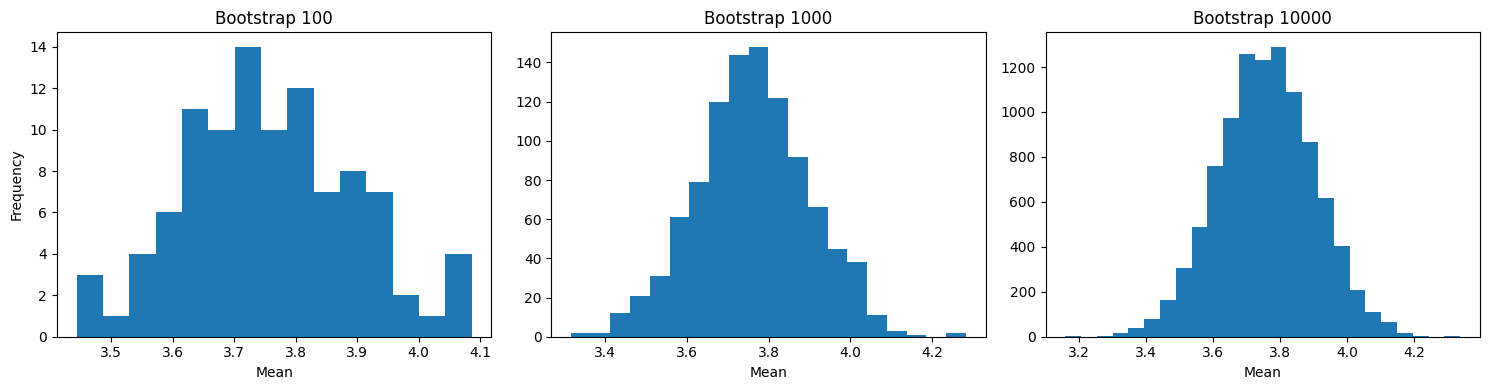

In [15]:
# a. Histogram Distribusi Mean Bootstrap

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram 100
axes[0].hist(means_100, bins=15)
axes[0].set_title("Bootstrap 100")
axes[0].set_xlabel("Mean")
axes[0].set_ylabel("Frequency")

# Histogram 1000
axes[1].hist(means_1000, bins=20)
axes[1].set_title("Bootstrap 1000")
axes[1].set_xlabel("Mean")

# Histogram 10000
axes[2].hist(means_10000, bins=25)
axes[2].set_title("Bootstrap 10000")
axes[2].set_xlabel("Mean")

plt.tight_layout()
plt.show()

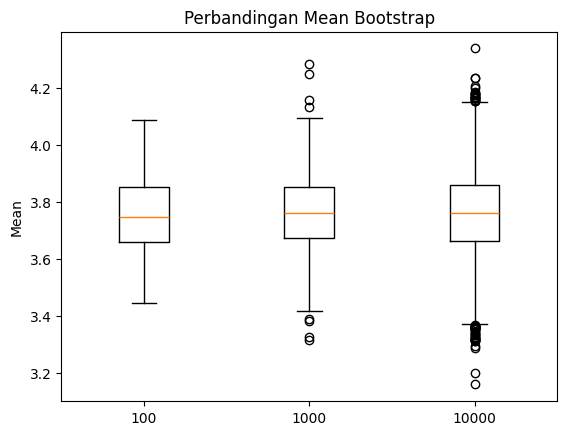

In [16]:
# b. Boxplot Perbandingan Sekaligus

plt.figure()
plt.boxplot([means_100, means_1000, means_10000])
plt.xticks([1, 2, 3], ["100", "1000", "10000"])
plt.title("Perbandingan Mean Bootstrap")
plt.ylabel("Mean")
plt.show()

Berdasarkan histogram distribusi mean bootstrap, terlihat bahwa pada 100 kali bootstrap, distribusi mean masih terlihat cukup kasar dan belum terlalu halus. Ketika jumlah bootstrap ditingkatkan menjadi 1000 kali, distribusi mulai membentuk pola yang lebih menyerupai distribusi normal (berbentuk lonceng). Pada 10000 kali bootstrap, distribusi mean menjadi semakin halus, simetris, dan stabil di sekitar nilai mean asli (sekitar 3.75–3.76). Hal ini menunjukkan bahwa semakin banyak jumlah resampling, estimasi parameter menjadi semakin konsisten.

Dari boxplot perbandingan mean bootstrap, terlihat bahwa median ketiga kelompok (100, 1000, dan 10000) berada pada nilai yang hampir sama. Namun, pada 100 kali bootstrap, penyebaran (IQR) relatif lebih lebar dan variasinya masih lebih besar. Pada 1000 dan terutama 10000 kali bootstrap, distribusi menjadi lebih stabil dan konsisten, meskipun tetap terdapat beberapa nilai ekstrem (outlier) yang muncul akibat proses resampling acak.

Secara keseluruhan, semakin besar jumlah bootstrap yang dilakukan, semakin stabil dan mendekati nilai mean asli hasil estimasinya. Hal ini membuktikan bahwa bootstrap berulang meningkatkan keandalan estimasi parameter statistik.

### 4. Interval Kepercayaan 95%

Confidence Interval 95% pada bootstrap dihitung menggunakan metode persentil. Langkahnya adalah sebagai berikut:

1. Lakukan bootstrap berulang dan simpan seluruh nilai mean hasil resampling.
2. Urutkan seluruh nilai mean tersebut.
3. Ambil nilai pada persentil 2.5% sebagai batas bawah (lower bound).
4. Ambil nilai pada persentil 97.5% sebagai batas atas (upper bound).

Karena tingkat kepercayaan yang digunakan adalah 95%, maka sisa 5% dibagi ke dua sisi distribusi, yaitu 2.5% di bagian kiri dan 2.5% di bagian kanan. Rentang antara kedua nilai tersebut menjadi interval kepercayaan 95%.

In [17]:
# Fungsi untuk menghitung CI 95%

def confidence_interval(data):
    lower = np.percentile(data, 2.5)
    upper = np.percentile(data, 97.5)
    return lower, upper

In [18]:
# Hitung CI

ci_100 = confidence_interval(means_100)
ci_1000 = confidence_interval(means_1000)
ci_10000 = confidence_interval(means_10000)

In [19]:
# Tampilkan Hasil

print("\nBootstrap 100:")
print("Lower (2.5%) :", ci_100[0])
print("Upper (97.5%):", ci_100[1])

print("\nBootstrap 1000:")
print("Lower (2.5%) :", ci_1000[0])
print("Upper (97.5%):", ci_1000[1])

print("\nBootstrap 10000:")
print("Lower (2.5%) :", ci_10000[0])
print("Upper (97.5%):", ci_10000[1])


Bootstrap 100:
Lower (2.5%) : 3.4787333333333335
Upper (97.5%): 4.059716666666667

Bootstrap 1000:
Lower (2.5%) : 3.4786666666666672
Upper (97.5%): 4.023433333333333

Bootstrap 10000:
Lower (2.5%) : 3.4779999999999998
Upper (97.5%): 4.036683333333333


Hasil interval berbeda karena bootstrap menggunakan proses resampling acak. Pada 100 kali bootstrap, jumlah sampel masih sedikit sehingga variasinya lebih besar dan interval cenderung lebih lebar. Ketika jumlah bootstrap ditingkatkan menjadi 1000 dan 10000, distribusi mean menjadi lebih stabil dan mendekati nilai asli, sehingga interval kepercayaan menjadi lebih konsisten dan sedikit lebih sempit. Semakin banyak resampling, semakin akurat dan stabil estimasinya.

## Bagian C — Perbandingan dan Analisis 

Jawab pertanyaan berikut: 
1. Apakah mean bootstrap mendekati mean data asli? 
2. Bagaimana perubahan distribusi saat jumlah bootstrap bertambah? 
3. Mana yang lebih stabil: 100, 1000, atau 10000? 
4. Apakah mean asli berada dalam interval kepercayaan? 
5. Mengapa satu data bisa muncul berkali-kali pada bootstrap? 

1. Apakah mean bootstrap mendekati mean data asli?

    Mean hasil bootstrap (100, 1000, dan 10000 kali) semuanya sangat mendekati mean data asli (sekitar 3.758). Perbedaannya sangat kecil dan hanya disebabkan oleh variasi acak dari proses resampling. 

2. Bagaimana perubahan distribusi saat jumlah bootstrap bertambah?

    Semakin banyak jumlah bootstrap:

    - Distribusi mean semakin halus.
    - Bentuknya semakin menyerupai distribusi normal (lonceng).
    - Variasi acak semakin terkendali.

    Pada 100 bootstrap distribusi masih agak kasar, sedangkan pada 10000 sudah sangat stabil dan simetris.

3. Mana yang lebih stabil: 100, 1000, atau 10000?

    Yang paling stabil adalah 10000 bootstrap. Karena semakin banyak resampling, estimasi mean dan interval kepercayaan menjadi lebih konsisten dan tidak terlalu dipengaruhi oleh variasi acak.

4. Apakah mean asli berada dalam interval kepercayaan?

    Dari hasil CI 95% yang kamu hitung, mean asli berada di dalam interval kepercayaan untuk 100, 1000, maupun 10000 bootstrap. Ini menunjukkan bahwa estimasi bootstrap cukup akurat.

5.  Mengapa satu data bisa muncul berkali-kali pada bootstrap?

    Karena bootstrap menggunakan sampling dengan pengembalian (replace=True). Artinya setelah satu data terpilih, data tersebut dikembalikan lagi ke populasi sehingga bisa terpilih kembali. Itulah sebabnya satu nilai bisa muncul beberapa kali dalam satu sampel bootstrap.

## Bagian D — Kesimpulan

Tuliskan: 
- Insight utama dari EDA dataset Iris 
- Karakteristik tiap spesies (berdasarkan visualisasi) 
- Manfaat bootstrap dalam analisis data 
- Jumlah bootstrap yang menurut Anda cukup

Dataset Iris terdiri dari 150 data yang seimbang pada tiga spesies. Variabel petal length dan petal width memiliki variasi paling besar dan menunjukkan pola pemisahan yang jelas antar spesies. Sebaliknya, sepal width memiliki overlap cukup tinggi sehingga kurang kuat dalam membedakan kelas.

**Karakteristik Tiap Spesies**

- Setosa → Memiliki petal paling kecil dan terpisah jelas dari dua spesies lain, sehingga mudah diklasifikasikan.
- Versicolor → Berada di tengah dengan ukuran petal sedang dan sedikit overlap dengan virginica.
- Virginica → Memiliki petal paling besar dan variasi paling tinggi dibanding spesies lainnya.

Perbedaan paling signifikan terlihat pada variabel petal.

**Manfaat Bootstrap**

Bootstrap digunakan untuk mengestimasi mean dan membentuk interval kepercayaan tanpa asumsi distribusi tertentu. Metode ini membantu mengukur stabilitas estimasi dan memahami variasi akibat proses sampling acak.

**Jumlah Bootstrap yang Cukup**

- Pada 100 bootstrap hasil masih cukup bervariasi.
- Pada 1000 bootstrap hasil mulai stabil.
- Pada 10000 bootstrap hasil paling konsisten dan interval kepercayaan lebih presisi.

Secara praktis, 1000–10000 bootstrap sudah cukup stabil untuk analisis.